<a href="https://colab.research.google.com/github/apnaschool-mnpm/apnaschool_786/blob/main/use_train_csv_in_logistic_regression%2Clog_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer




In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MACHINE_LEARNING/train (2).csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x=df.iloc[:,1:4]
y=df.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=50)

<ipython-input-72-d2324642cd47>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(245)


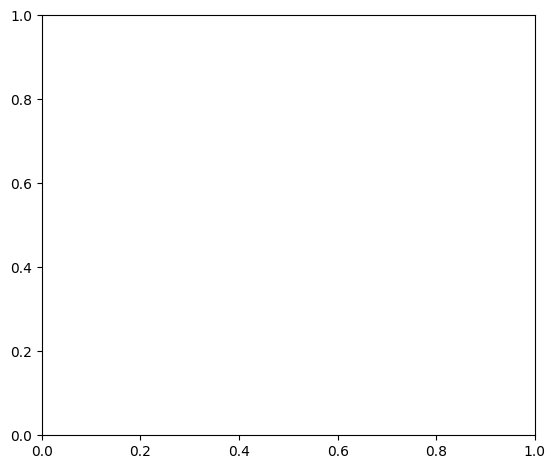

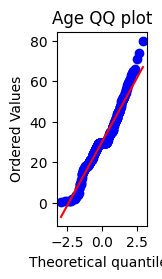

In [ ]:
plt.figure(figsize=(14,12))
plt.subplot(223)
sns.displot(x_train['Age'])
plt.title('Age PDF')
plt.subplot(245)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')
plt.show()




<ipython-input-81-5df6d9782a04>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(122)


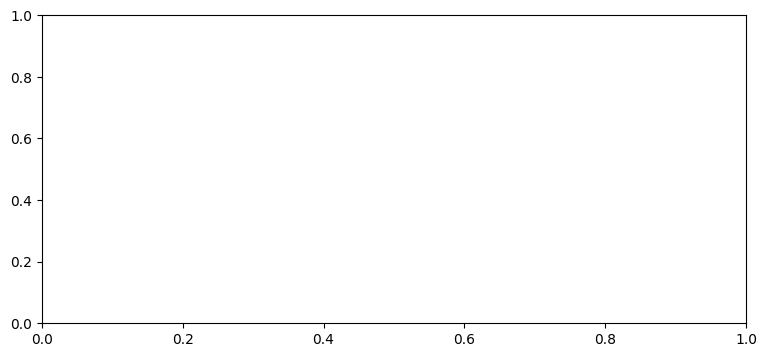

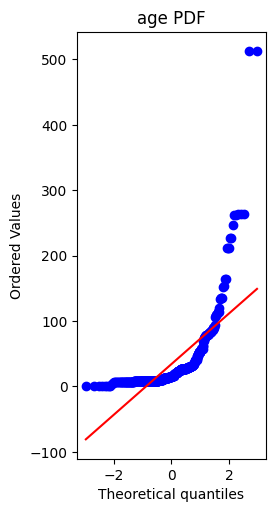

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(121)
sns.displot(x_train['Fare'])
plt.title("Age PDF")
plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("age PDF")
plt.show()



In [99]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
y_pred = clf1.predict(x_test)
y_pred1 = clf2.predict(x_test)
print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred1))


accuracy LR 0.6569506726457399
accuracy DT 0.5896860986547086


In [108]:
trf = FunctionTransformer(func=np.log1p)


In [109]:
x_train_transformed=trf.fit_transform(x_train)
x_test_transformed=trf.transform(x_test)


In [ ]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
y_pred=clf1.predict(x_train_transformed)
y_pred1=clf2.predict(x_test_transformed)




print("accuracy LR",accuracy_score(y_test,y_pred))
print("accuracy DT",accuracy_score(y_test,y_pred1))


In [130]:
x_transformed=trf.fit_transform(x)
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()
print("lr",np.mean(cross_val_score(clf1,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

lr 0.678027465667915
DT 0.6655680399500624


Text(0.5, 1.0, 'fare aftyer plot')

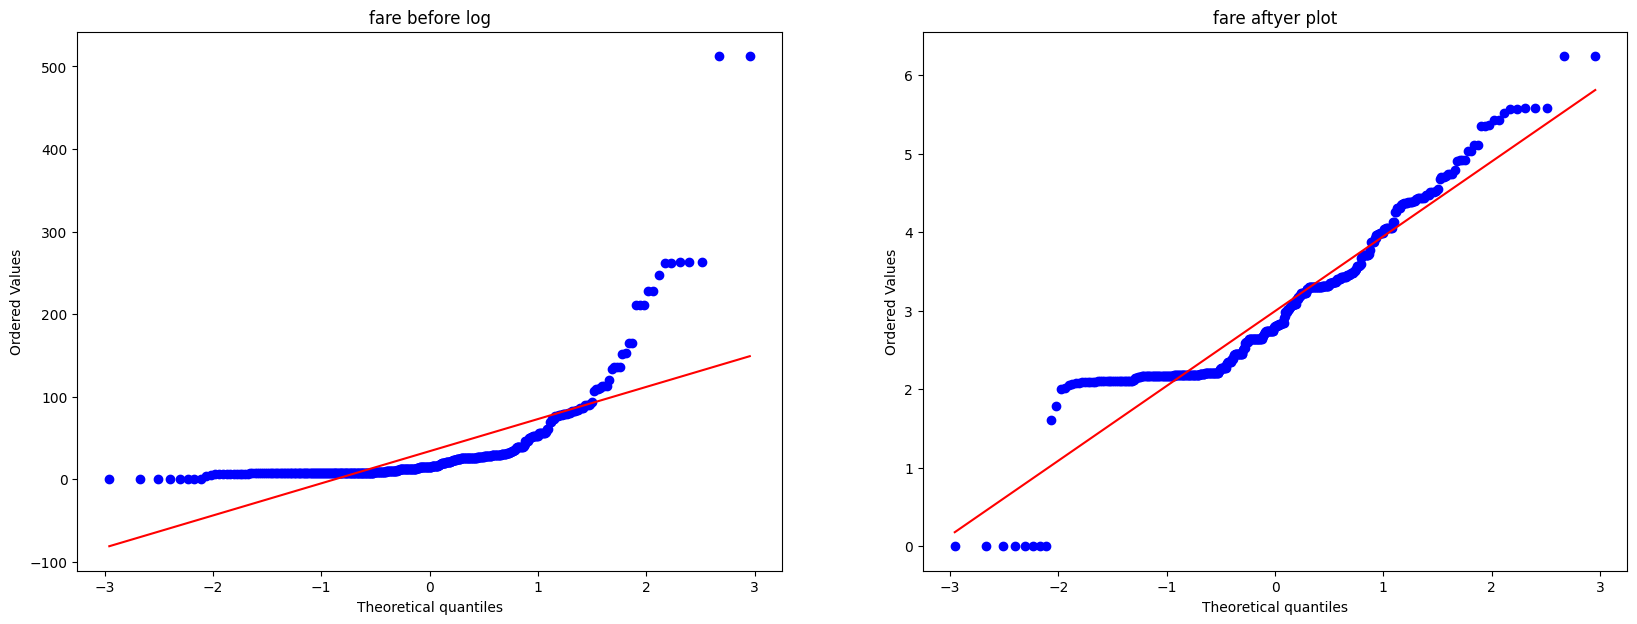

In [141]:
plt.figure(figsize=(20,7))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("fare before log")



plt.subplot(122)
stats.probplot(x_train_transformed['Fare'],dist="norm",plot=plt)
plt.title("fare aftyer plot")